=====Project Statement=====
AAL has been a well-known name in Australia, particularly recognized for its
clothing business since 2000. The company serves diverse demographics,
including kids, women, men, and seniors, and has established branches across
various states in Australia, encompassing metropolises as well as tier-1 and tier2 cities.
Currently experiencing a surge in business, AAL is actively pursuing expansion
opportunities. To facilitate informed investment decisions, the CEO has assigned
the responsibility to the Head of Sales and Marketing (S&M) at AAL

The specific tasks include:

1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The Head of Sales
and Marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia,
examining it on a state-by-state basis. Provide insights to assist the company in
making data-driven decisions for the upcoming year

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_excel("C:/Users/ADMIN/Documents/Smipli Learning/practicals/1688639662_ausapparalsales4thqrt2020.xlsx")


In [7]:
da = df
da.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [8]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [9]:
df.shape

(7560, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [11]:
numerical_columns = list(df._get_numeric_data().columns)
numerical_columns

['Unit', 'Sales']

In [12]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_columns

['Time', 'Date', 'Group', 'State']

# Observation

1. This dataset consists of 7560 rows with 6 columns
2. There are 2 columns with continuous data and three columns with Categorical data and one column with datetime
3. The Unit, sales are int datatype and Time, State, Group are object data type and Date is datetime datatype

# Data wrangling

# Check for Missing or incorrect Entries

In [13]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [14]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [15]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

# Observation

1. This data set doesn't have any Null values or Incorrect Values
2. No need to dropping null values because it doesn't have any null values.

In [16]:
#Normalization

In [17]:
numerical_cols = ['Sales','Unit']

In [18]:
scaler = MinMaxScaler()

In [19]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
df[numerical_cols]

,Sales,Unit
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [21]:
df[numerical_cols].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [22]:
df.groupby(['State']).mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4732\3142024487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['State']).mean()


,Unit,Sales
State,,
NSW,0.408995,0.408995
NT,0.100999,0.100999
QLD,0.164712,0.164712
SA,0.314271,0.314271
TAS,0.102058,0.102058
VIC,0.588859,0.588859
WA,0.098486,0.098486


In [23]:
df.groupby(['State']).min()

,Date,Time,Group,Unit,Sales
State,,,,,
NSW,2020-10-01,Afternoon,Kids,0.158730,0.158730
NT,2020-10-01,Afternoon,Kids,0.000000,0.000000
QLD,2020-10-01,Afternoon,Kids,0.015873,0.015873
SA,2020-10-01,Afternoon,Kids,0.126984,0.126984
TAS,2020-10-01,Afternoon,Kids,0.000000,0.000000
VIC,2020-10-01,Afternoon,Kids,0.285714,0.285714
WA,2020-10-01,Afternoon,Kids,0.000000,0.000000


In [24]:
df.groupby(['State']).max()

,Date,Time,Group,Unit,Sales
State,,,,,
NSW,2020-12-30,Morning,Women,0.682540,0.682540
NT,2020-12-30,Morning,Women,0.206349,0.206349
QLD,2020-12-30,Morning,Women,0.365079,0.365079
SA,2020-12-30,Morning,Women,0.523810,0.523810
TAS,2020-12-30,Morning,Women,0.206349,0.206349
VIC,2020-12-30,Morning,Women,1.000000,1.000000
WA,2020-12-30,Morning,Women,0.206349,0.206349


In [47]:
state_sales = df.groupby('State')['Sales'].min()
pd.DataFrame state_sales

State
 NSW    0.158730
 NT     0.000000
 QLD    0.015873
 SA     0.126984
 TAS    0.000000
 VIC    0.285714
 WA     0.000000
Name: Sales, dtype: float64

In [49]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


In [48]:
state_sales_max = df.groupby('State')['Sales'].max()
state_sales_max

State
 NSW    0.682540
 NT     0.206349
 QLD    0.365079
 SA     0.523810
 TAS    0.206349
 VIC    1.000000
 WA     0.206349
Name: Sales, dtype: float64

In [26]:
state_sales

State
 NSW    0.158730
 NT     0.000000
 QLD    0.015873
 SA     0.126984
 TAS    0.000000
 VIC    0.285714
 WA     0.000000
Name: Sales, dtype: float64

In [51]:
state_group_sales  = df.groupby(['State','Group'])['Sales'].sum()
state_group_sales

State  Group   
 NSW    Kids       109.444444
        Men        112.206349
        Seniors    106.904762
        Women      113.158730
 NT     Kids        27.619048
        Men         28.015873
        Seniors     26.126984
        Women       27.317460
 QLD    Kids        45.460317
        Men         44.714286
        Seniors     43.428571
        Women       44.285714
 SA     Kids        83.587302
        Men         84.476190
        Seniors     84.873016
        Women       86.476190
 TAS    Kids        28.095238
        Men         27.984127
        Seniors     27.301587
        Women       26.841270
 VIC    Kids       158.793651
        Men        159.095238
        Seniors    158.507937
        Women      159.571429
 WA     Kids        27.142857
        Men         27.952381
        Seniors     26.428571
        Women       24.841270
Name: Sales, dtype: float64

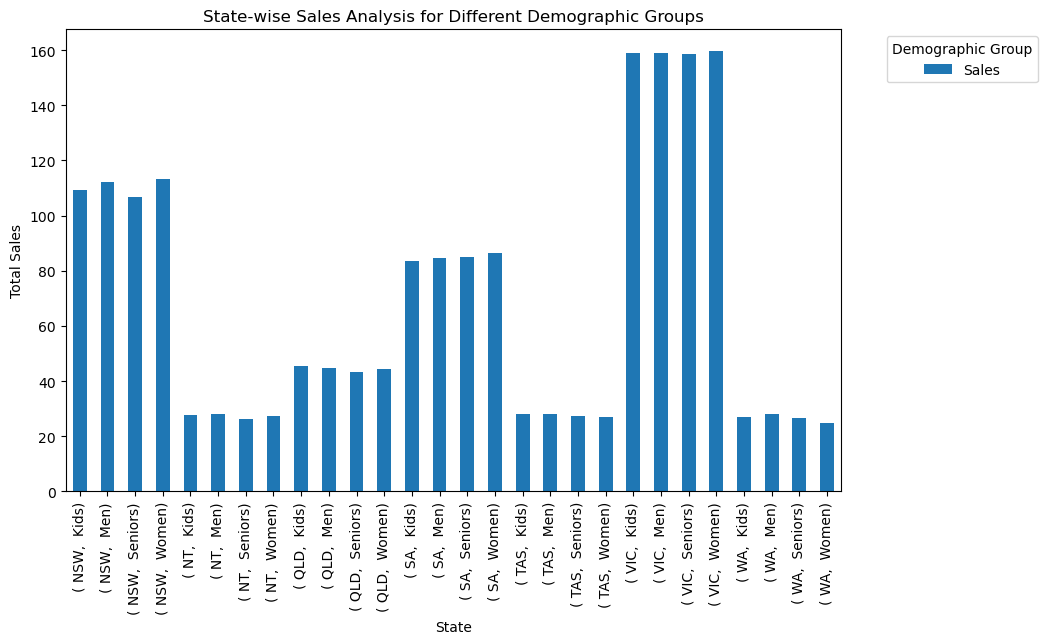

In [28]:
state_group_sales.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Demographic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
time_of_day_sales = df.groupby('Date')['Sales'].sum()

In [30]:
time_of_day_sales

Date
2020-10-01    20.952381
2020-10-02    20.920635
2020-10-03    22.031746
2020-10-04    20.952381
2020-10-05    21.857143
                ...    
2020-12-26    27.269841
2020-12-27    26.777778
2020-12-28    26.507937
2020-12-29    26.587302
2020-12-30    26.476190
Name: Sales, Length: 90, dtype: float64

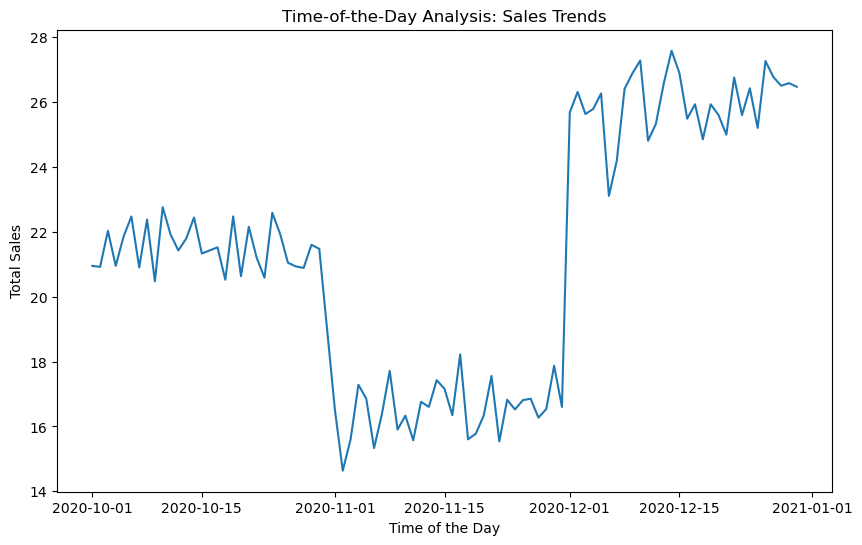

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_of_day_sales.index, y=time_of_day_sales.values)
plt.title('Time-of-the-Day Analysis: Sales Trends')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

# Observation

1. The purpose of group by analysis was to identify patterns in sales data for different demographic groups  across various states.
2. States having lowest sale is [WA]
3. States having highest sale is [VIC]

# Data Analysis

### Descriptive Statistics Analysis

In [32]:
descriptive_stats = da[['Sales','Unit']].describe()

In [33]:
descriptive_stats

,Sales,Unit
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


<Axes: xlabel='Unit'>

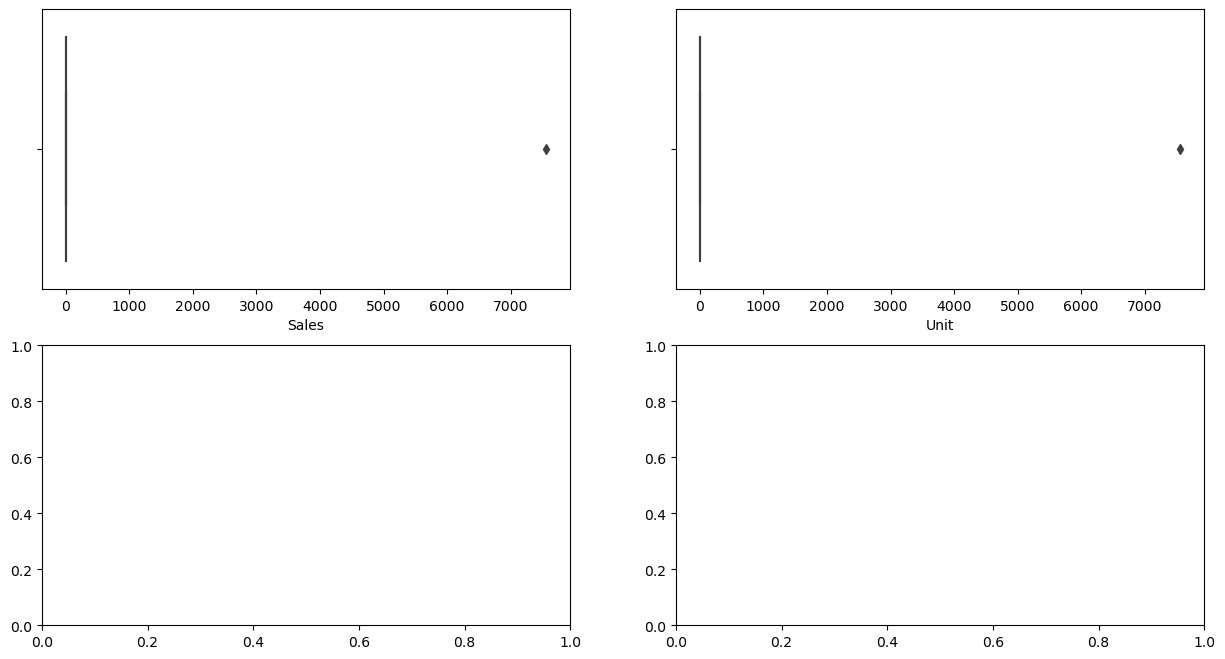

In [60]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data= descriptive_stats, x="Sales", ax = axs[0,0])
sns.boxplot(data= descriptive_stats, x="Unit", ax = axs[0,1])

In [35]:
#Identify the group with the highest and lowest sales
highest_sales_Group = df.groupby('Group')['Sales'].sum()

In [36]:
highest_sales_Group

Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64

In [37]:
highest_sales_Group.idxmax()

' Men'

In [38]:
Lowest_sales_Group = df.groupby('Group')['Sales'].sum()

In [39]:
Lowest_sales_Group.idxmin()

' Seniors'

In [40]:
reports = df

In [41]:
reports = reports.set_index(['Date'])

In [42]:
reports.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,0.095238,0.095238
2020-10-01,Morning,WA,Men,0.095238,0.095238
2020-10-01,Morning,WA,Women,0.031746,0.031746
2020-10-01,Morning,WA,Seniors,0.206349,0.206349
2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


In [43]:
# Generate reports
weekly_report = reports.resample('W-Mon').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4732\438089966.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report = reports.resample('W-Mon').sum()


In [44]:
weekly_report

,Unit,Sales
Date,,
2020-10-05,106.714286,106.714286
2020-10-12,152.349206,152.349206
2020-10-19,151.523810,151.523810
2020-10-26,150.158730,150.158730
2020-11-02,116.047619,116.047619
2020-11-09,115.079365,115.079365
2020-11-16,116.206349,116.206349
2020-11-23,115.857143,115.857143
2020-11-30,117.476190,117.476190


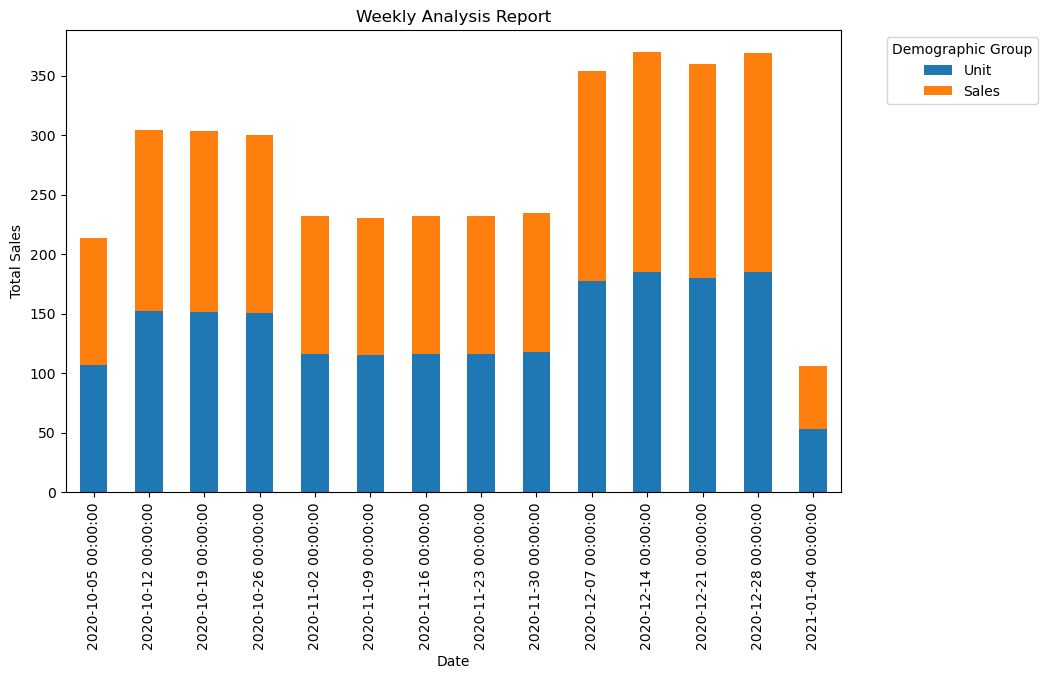

In [45]:
#Barplot for weekly report

weekly_report.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Weekly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Demographic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_report.index, y=weekly_report.values)
plt.title('Weekly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1000x600 with 0 Axes>

In [54]:
monthly_report = reports.resample('M').sum()
monthly_report

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4732\4097097687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_report = reports.resample('M').sum()


,Unit,Sales
Date,,
2020-10-31,645.650794,645.650794
2020-11-30,495.761905,495.761905
2020-12-31,779.238095,779.238095


In [55]:
monthly_report_data = monthly_report['Sales']
monthly_report_data

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: M, Name: Sales, dtype: float64

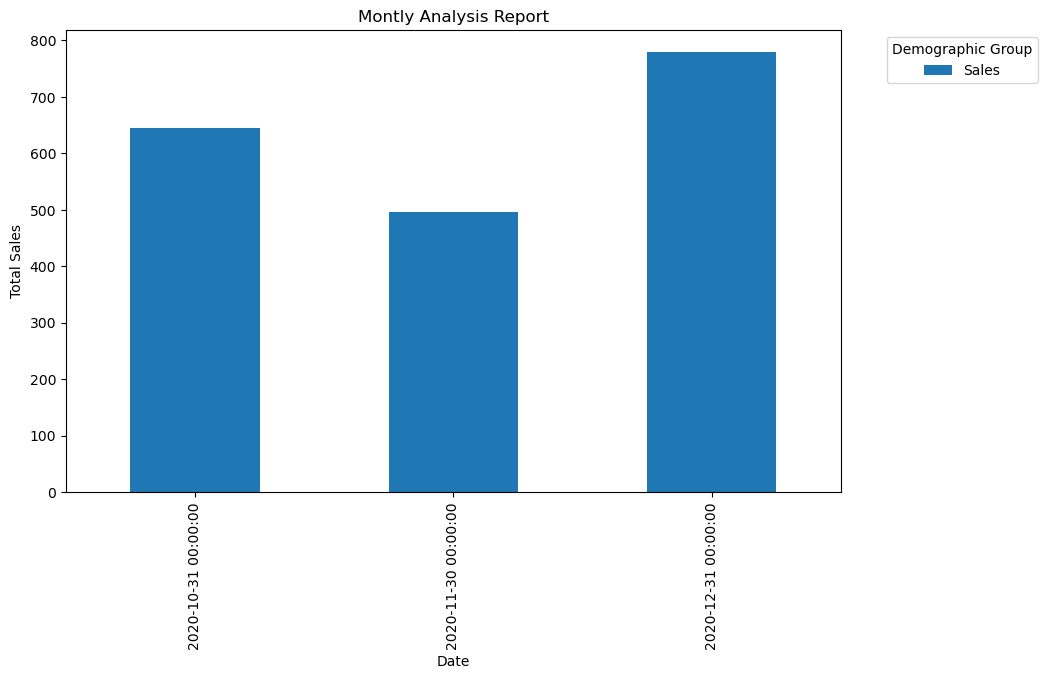

In [56]:
#Montly Analysis Graph for Sales
monthly_report_data.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Montly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Demographic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

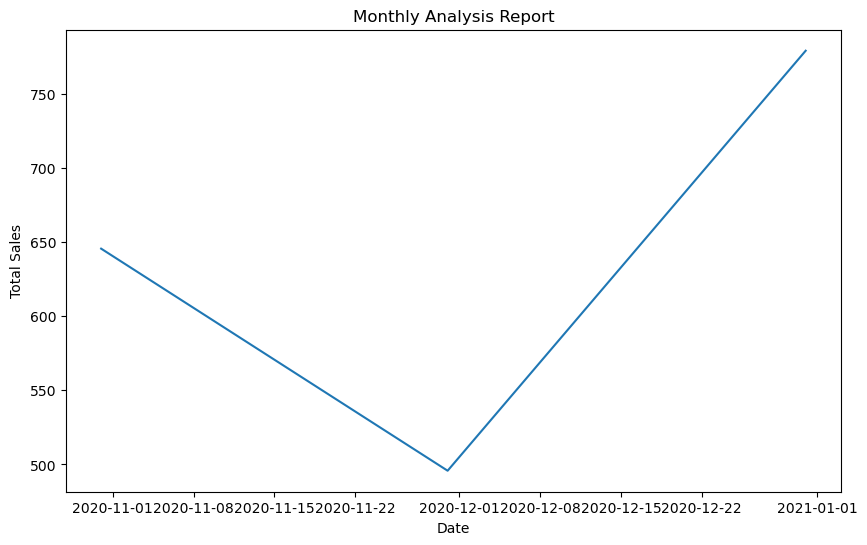

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_report_data.index, y=monthly_report_data.values)
plt.title('Monthly Analysis Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [62]:
quarterly_report = reports.resample('Q').sum()
quarterly_report

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4732\464202733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_report = reports.resample('Q').sum()


,Unit,Sales
Date,,
2020-12-31,1920.650794,1920.650794


In [ ]:
df['Date'].unique()

In [51]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


In [58]:
state_group_saless  = df.groupby(['State','Group'])['Sales'].sum()
state_group_saless

State  Group   
 NSW    Kids       109.444444
        Men        112.206349
        Seniors    106.904762
        Women      113.158730
 NT     Kids        27.619048
        Men         28.015873
        Seniors     26.126984
        Women       27.317460
 QLD    Kids        45.460317
        Men         44.714286
        Seniors     43.428571
        Women       44.285714
 SA     Kids        83.587302
        Men         84.476190
        Seniors     84.873016
        Women       86.476190
 TAS    Kids        28.095238
        Men         27.984127
        Seniors     27.301587
        Women       26.841270
 VIC    Kids       158.793651
        Men        159.095238
        Seniors    158.507937
        Women      159.571429
 WA     Kids        27.142857
        Men         27.952381
        Seniors     26.428571
        Women       24.841270
Name: Sales, dtype: float64